<a href="https://colab.research.google.com/github/Caroline-Camargo/RelatoriosPython-CalculoNumericoComputacional/blob/main/Relatorio2_CarolineSouzaCamargo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório 2 Caroline Souza Camargo

# Métodos

In [ ]:
# Bibliotecas
import numpy as np
import math

In [ ]:
def eliminacaoGauss(n, A, b, pivotamentoParcial = True, casaDecimalArredondamento = 100):
  # Verifica se A é uma matriz quadrada
  if len(A) != len(A[0]):
    print("A matriz não é quadrada")
    return False

  # Verifica número de equações e termos independentes:
  if len(A) != len(b):
    print("O número de equações deve ser igual ao número de termos independentes")
    return False

  det = 1
  info = 0
  for j in range(0, n - 1):
    p = j
    Amax = abs(A[j][j])  # Pivô inicial

    if pivotamentoParcial:
      # Encontra o maior pivô na coluna abaixo do pivô atual
      for k in range(j + 1, n):
        if abs(A[k][j]) > Amax:
          Amax = abs(A[k][j])
          p = k

      # Troca de linhas se necessário, atualizando o determinante
      if p != j:
        for k in range(0, n):  # Troca de linha na matriz
          t = A[j][k]
          A[j][k] = A[p][k]
          A[p][k] = t

        t = b[j]  # Troca de linha no vetor de termos independentes
        b[j] = b[p]
        b[p] = t
        det = - det  # Troca de linhas inverte o sinal do determinante

    if Amax == 0: # Pivô nulo
      print("O sistema não adimite solução, pivô não pode ser nulo")
      return False

    det = np.round(det * A[j][j], casaDecimalArredondamento)  # Multiplica o determinante pelo pivô atual

    # Atualiza a matriz e o vetor de termos independentes
    if abs(A[j][j]) != 0:
      r = np.round(1 / A[j][j], casaDecimalArredondamento)  # Fator de normalização
      for i in range(j + 1, n):
        mult = np.round(A[i][j] * r, casaDecimalArredondamento)
        A[i][j] = 0
        for k in range(j + 1, n):
          A[i][k] = np.round(A[i][k] - mult * A[j][k], casaDecimalArredondamento)
        b[i] = np.round(b[i] - mult * b[j], casaDecimalArredondamento)
    else:
      if info == 0:
        info = j

  # Cálculo final do determinante
  det = np.round(det * A[n-1][n-1], casaDecimalArredondamento)

  if info == 0 and abs(A[n-1][n-1]) == 0:
    info = n

  # Exibe informações de saída e a matriz resultante após a eliminação de Gauss
  print(f'\nDet: {det}')
  print(f'\nInfo: \n{info}')
  print(f'\nMatriz final: \n{A}')

  # Etapa de retro-substituição
  return np.round(np.linalg.solve(A, b), casaDecimalArredondamento)

In [ ]:
def FatoracaoLU(m, n, A, b):
  # Verifica se A é uma matriz quadrada
  if m != n:
    print("A matriz não é quadrada")
    return False

  # Verifica número de equações e termos independentes:
  if len(A) != len(b):
    print("O número de equações deve ser igual ao número de termos independentes")
    return False

  # Verifica se a matriz é não singular (solução única)
  for k in range(1, n+1):
    det = np.linalg.det(A[:k, :k])
    if det == 0:
      print("A matriz não é singular")
      return False

  U = A.copy()
  L = np.eye(m) # Inicializa matriz L como uma matriz identidade

  pivot = []
  for i in range(0, m):
    pivot.append(i)

  PdU = 1
  info = 0

  # Loop para a decomposição LU
  for j in range(0, min(m, n)):
    p = j
    Amax = abs(U[j][j])

    for k in range(j + 1, m): # Encontra o pivô máximo
      if abs(U[k][j]) > Amax:
        Amax = abs(U[k][j])
        p = k

    # Verifica se o pivô é nulo
    if Amax == 0:
      print("O sistema não admite solução, pivô não pode ser nulo")
      return False

    # Troca de linhas se necessário
    if p != j:
      for k in range(0, n):
        t = U[j][k]
        U[j][k] = U[p][k]
        U[p][k] = t

      t = U[j].copy()
      U[j] = U[p]
      U[p] = t

      # Atualiza índices de pivô e o produto dos termos diagonais de U
      i = pivot[j]
      pivot[j] = pivot[p]
      pivot[p] = i
      PdU = -PdU

    # Atualiza o produto dos termos diagonais de U
    PdU = PdU * U[j][j]

    # Atualiza as matrizes L e U
    if abs(U[j][j]) != 0:
      r = 1 / U[j][j]
      for i in range(j + 1, m):
        mult = U[i][j] * r
        L[i][j] = mult  # Preenche a matriz L com os multiplicadores utilizados
        U[i][j] = 0
        for k in range(j + 1, n):
          U[i][k] = U[i][k] - mult * U[j][k]
    else:
      if info == 0: # Verifica se o pivô é zero
        info = j

  # Resolve Ly = b e Ux = y para obter a solução final X
  y = np.linalg.solve(L, b)
  X = np.linalg.solve(U, y)

  # Exibe informações de saída e a matriz resultante após a eliminação de Gauss
  print(f'\nPivot: {pivot}')
  print(f'\nPdU: {PdU}')
  print(f'\nMatriz U: \n{U} \n\nMatriz L: \n{L}')

  # Retorna a solução arredondada para 3 casas decimais
  return np.around(X, 3)

In [ ]:
def fatoracaoCholesky(n, A, b):
  # Verifica se A é uma matriz quadrada
  if len(A) != len(A[0]):
    print("A matriz não é quadrada")
    return False

  # Verifica número de equações e termos independentes:
  if len(A) != len(b):
    print("O número de equações deve ser igual ao número de termos independentes")
    return False

  # Verifica se a matriz é simétrica
  if not np.array_equal(A, A.T):
    print("A matriz não é simétrica")
    return False

  # Verifica se todos os menores principais tem determinante positivo
  for k in range(0, n):
    det = np.linalg.det(A[:k, :k])
    if det < 0:
      print("A matriz não é positiva definida")
      return False

  det = 1
  info = 0
  for j in range(0, n):
    soma = 0
    for k in range(0, j): # Loop para calcular a soma
      soma = soma + A[j][k] * A[j][k]
    t = A[j][j] - soma

    if t > 0: # Verifica se a matriz é positiva
      A[j][j] = math.sqrt(t)
      r = 1 / A[j][j]
      det = det * t
    else:
      info = j
      return('Matriz não é definida como positiva')

    # Atualização dos elementos abaixo da diagonal principal
    for i in range(j + 1, n):
      soma = 0
      for k in range(0, j):
        soma = soma + A[i][k] * A[j][k]
      A[i][j] = (A[i][j] - soma) * r

  G = np.tril(A) # Matriz triangular inferior
  Gt = G.T # Transposta da matriz triangular inferior

  # Resolve  Gy = b e Gt*x = y para obter a solução final X
  y = np.linalg.solve(G, b)
  x = np.linalg.solve(Gt, y)

  # Exibe informações de saída e a matriz resultante após a eliminação de Gauss
  print(f'\nDet: {det}')
  print(f'\nInfo: {info}')
  print(f'\nMatriz G: \n{G} \n\nMatriz Gt: \n{Gt}')

  return x

In [ ]:
def GaussJacobi(n, A, b, Toler, IterMax = 100):
  if testesConvergencia(A, 'jacobi') is False:
    return False

  x = []
  for i in range(0, n): # Inicialização de x com uma estimativa inicial
    x.append(b[i] / A[i][i])

  # Contador de iterações
  Iter = 0

  while True:
    v = []
    Iter = Iter + 1

    # Cálculo da próxima iteração
    for i in range(0, n):
      Soma = 0
      for j in range(0, n):
        if i != j:
          Soma = Soma + A[i][j] * x[j]
      v.append((b[i] - Soma) / A[i][i])

    # Cálculo das normas para avaliar a convergência
    NormaNum = 0.0
    NormaDen = 0.0
    for i in range(0, n):
      t = abs(v[i] - x[i])
      if t > NormaNum:
        NormaNum = t
      if abs(v[i]) > NormaDen:
        NormaDen = abs(v[i])
      x[i] = v[i]

    # Cálculo da norma relativa
    NormaRel = float(NormaNum / NormaDen)

    # Teste de convergência
    if NormaRel <= Toler or Iter >= IterMax:
      break

  print(f'\nIter: {Iter}')

  # Determinação da informação sobre a convergência
  if NormaRel <= Toler:
    Info = 0
  else:
    Info = 1
  print(f'\nInfo: {Info}')

  return x

In [ ]:
def GaussSeidel(n, A, b, Toler, IterMax = 100):
  if testesConvergencia(A, 'seidel') is False:
    return False

  x = []
  for i in range(0, n): # Inicialização de x com uma estimativa inicial
    x.append(b[i] / A[i][i])

  # Contador de iterações
  Iter = 0

  while True:
    Iter = Iter + 1
    NormaNum = 0.0
    NormaDen = 0.0

    v = []    # Lista temporária para armazenar os valores antigos de x
    for i in range(0, n):
      Soma = 0
      for j in range(0, n):
        if i != j:
          Soma = Soma + A[i][j] * x[j]
      v.append(x[i])   # Armazena o valor antigo de x[i]
      x[i] = (b[i] - Soma) / A[i][i]   # Atualiza x[i] com o novo valor
      t = abs(v[i] - x[i])   # Calcula a diferença entre os valores antigo e novo

      if t > NormaNum: # Atualiza a norma numérica
        NormaNum = t

      if abs(x[i]) > NormaDen: # Atualiza a norma do denominador
        NormaDen = abs(x[i])

    NormaRel = NormaNum / NormaDen   # Calcula a norma relativa

    # Teste de convergência
    if NormaRel <= Toler or Iter >= IterMax:
        break

  print(f'\nIter: {Iter}')

  # Determinação da informação sobre a convergência
  if NormaRel <= Toler:
    info = 0
  else:
    info = 1
  print(f'\nInfo: {info}')
  return x

In [ ]:
def testesConvergencia(matriz, metodo = 'jacobi'):
  if metodo == 'jacobi' or metodo == 'seidel':
    # Verificando condição do Raio Espectral
    raio = 1
    autovalores, autovetores = np.linalg.eig(matriz)
    if abs(max(autovalores)) > 1:
      raio = 0

    print(f'\nTeste Raio Espectral: ')
    if raio == 0:
      print(f'Não converge')
    else:
      print(f'Converge')


    # Verificando critério das Linhas
    linha = 1
    for i in range(0, len(matriz)):
      somaLinha = 0
      for j in range(0, len(matriz[i])):
        if i != j:
          somaLinha += matriz[i][j]
      if matriz[i][i] <= somaLinha:
        linha = 0

    print(f'\nTeste critério Linhas: ')
    if linha == 0:
      print('Não converge')
    else:
      print(f'Converge')


    # Verificando critério Colunas
    coluna = 1
    for i in range(0, len(matriz)):
      somaColuna = 0
      for j in range(0, len(matriz[i])):
        if i != j:
          somaColuna += matriz[j][i]
      if matriz[i][i] <= somaColuna:
        coluna = 0

    print(f'\nTeste critério Colunas: ')
    if coluna == 0:
      print('Não converge')
    else:
      print(f'Converge')


  if metodo == 'seidel':
    # Verificando critério de Sassenfeld
    sassenfeld = 1
    b = [0] * len(matriz)
    for i in range(0, len(matriz)):
        soma1 = 0
        for j in range(i):
            soma1 += abs(matriz[i][j]) * b[j]
        soma2 = 0
        for j in range(i + 1, len(matriz)):
            soma2 += abs(matriz[i][j])
        b[i] = 1 / abs(matriz[i][i]) * (soma1 + soma2)

    print(f'\nTeste critério Sassenfeld: ')
    if max(b) < 1:
      print('Converge')
    else:
      sassenfeld = 0
      print('Não converge')

    if raio == 1 or linha == 1 or coluna == 1 or sassenfeld == 1:
      return True
    else:
      print(f'\n\nNão é possivel aplicar o método, não atendeu a nenhum critério')
      return False

  if raio == 1 or linha == 1 or coluna == 1:
    return True
  else:
    print(f'\n\nNão é possivel aplicar o método, não atendeu a nenhum critério')
    return False

# QUESTÕES

## QUESTÃO 1

**Considere os seguintes sistemas:**
\begin{equation}
\begin{cases}
    0.03x_1 + 58.9x_2 &= 59.2 \\
    5.31x_1 - 6.10x_2 &= 47.0 \\
\end{cases}
\end{equation}

\begin{equation}
\begin{cases}
    3.03x_1 - 12.1x_2 + 14x_3 &= -119 \\
    -3.03x_1 + 12.1x_2 - 7x_3 &= 120 \\
    6.11x_1 - 14.2x_2 + 21x_3 &= -139 \\
\end{cases}
\end{equation}

**a) Resolva os sistemas acima usando o Métodos Direto de Eliminação de Gauss com Pivotamento e operações aritméticas com aproximação de três dígitos por
arredondamento.**

**b) Verifique se os sistemas acima são convergente se aplicarmos os Métodos Iterativos
de Gauss-Jacobi e Gauss-Seidel. Justifique sua resposta.**

### Resposta

####a)

O primeiro passo na resolução do exercício consistiu em montar a matriz dos sistemas mencionados. Em seguida, apliquei a função de eliminação de Gauss para os sistemas. É importante destacar que esse método oferece a opção de escolher a implementação do pivotamento parcial, conforme necessário. Além disso, é possível especificar, como parâmetro, a quantidade de casas decimais a ser utilizada para arredondar cada uma das operações dentro do método.
Na resolução do exercício, a matriz 'A' representa a matriz dos coeficientes, enquanto o vetor 'b' corresponde ao vetor dos termos independentes.

Abaixo, segue a aplicação do sistema:

In [ ]:
# Dados fornecidos pelo exercício
pivotamento = True
arredondamento = 3

A1 = np.array([[0.03, 58.9],
              [5.31, -6.10]])
b1 = np.array([59.2, 47.0])

A2 = np.array([[3.03, -12.1, 14.0],
              [-3.03, 12.1, -7.0],
              [6.11, -14.2, 21.0]])
b2 = np.array([-119.0, 120.0, -139.0])


print(f'---SISTEMA 1---')
solucao = eliminacaoGauss(2, A1, b1, pivotamento, arredondamento)
print(f'\nVetor Solucao: \n{solucao}')

print(f'\n\n\n---SISTEMA 2---')
solucao = eliminacaoGauss(3, A2, b2, pivotamento, arredondamento)
print(f'\nVetor Solucao: \n{solucao}')

---SISTEMA 1---

Det: -312.955

Info: 
0

Matriz final: 
[[ 5.31  -6.1  ]
 [ 0.    58.937]]

Vetor Solucao: 
[10.  1.]



---SISTEMA 2---

Det: -215.599

Info: 
0

Matriz final: 
[[  6.11  -14.2    21.   ]
 [  0.      5.043   3.437]
 [  0.      0.      6.997]]

Vetor Solucao: 
[ 0.034 10.004  0.136]


Podemos observar que ambos os sistemas foram resolvidos com sucesso usando o método de eliminação de Gauss. Através do determinante é possivel avaliar se o sistema tem uma solução única. Nestes casos, o determinante é não nulo, o que significa que o sistema tem uma solução única. A informação 0 indica que o processo de eliminação de Gauss foi realizado sem problemas. Já a matriz final é resultado do processo de eliminação, sendo no formato triangular superior.

Por fim, é possivel visualisar vetores solução, que fornecem os valores das variáveis que satisfazem os sistemas lineares. No primeiro sistema x1 = 10 e x2 = 1. Já no segundo sistema a solução é x1 = 0.034, x2 = 10.004, e x3 = 0.136

####b)

Para verificar a convergência dos sistemas, foi essencial implementar a função denominada 'testesConvergencia'. Esta função avalia se os critérios necessários para a aplicação dos métodos iterativos de Gauss-Jacobi e Gauss-Seidel estão satisfeitos. Os critérios considerados incluem o critério das linhas, o critério das colunas e a condição do Raio Espectral. No caso do método de Gauss-Seidel, é também necessário verificar o critério de Sassenfeld. Se algum desses critérios for atendido, é viável aplicar o método. No entanto, se nenhum deles for satisfeito, o método não pode ser aplicado. Essa função é chamada antes de executar esses métodos. Uma análise criteriosa desses critérios é fundamental para assegurar a eficácia dos métodos iterativos e evitar potenciais problemas de divergência.
Abaixo segue a aplicação dos métodos Gauss-Jacobi e Gauss-Seidel para cada um dos dois sistemas:

In [ ]:
print(f'\n--- Aplicando Gauss-Jacobi ---')
solucao = GaussJacobi(2, A1, b1, 0.001)
if solucao:
  print(f'\nVetor Solucao: \n{np.round(solucao, 5)}')

print(f'\n\n')
solucao = GaussJacobi(3, A2, b2, 0.001)
if solucao:
  print(f'\nVetor Solucao: \n{np.round(solucao, 5)}')

print(f'\n\n\n--- Aplicando Gauss-Seidel ---')
solucao = GaussSeidel(2, A1, b1, 0.001)
if solucao:
  print(f'\nVetor Solucao: \n{np.round(solucao, 5)}')

print(f'\n\n')
solucao = GaussSeidel(3, A2, b2, 0.001)
if solucao:
  print(f'\nVetor Solucao: \n{np.round(solucao, 5)}')


--- Aplicando Gauss-Jacobi ---

Teste Raio Espectral: 
Não converge

Teste critério Linhas: 
Converge

Teste critério Colunas: 
Converge

Iter: 2

Info: 0

Vetor Solucao: 
[9.99963 0.99968]




Teste Raio Espectral: 
Não converge

Teste critério Linhas: 
Não converge

Teste critério Colunas: 
Não converge


Não é possivel aplicar o método, não atendeu a nenhum critério



--- Aplicando Gauss-Seidel ---

Teste Raio Espectral: 
Não converge

Teste critério Linhas: 
Converge

Teste critério Colunas: 
Converge

Teste critério Sassenfeld: 
Não converge

Iter: 2

Info: 0

Vetor Solucao: 
[9.99963 0.99968]




Teste Raio Espectral: 
Não converge

Teste critério Linhas: 
Não converge

Teste critério Colunas: 
Não converge

Teste critério Sassenfeld: 
Não converge


Não é possivel aplicar o método, não atendeu a nenhum critério


Observa-se que, ao empregar o método de Gauss-Jacobi na primeira função, pelo menos um dos critérios foram atendidos, uma vez que o método convergiu para os valores de x1 e x2. Notavelmente, os critérios de linhas e colunas foram satisfeitos, embora o teste do raio espectral não tenha sido. É importante ressaltar, como anteriormente mencionado, que a aceitação de apenas um critério é suficiente para a execução do método. Dado que os critérios de linhas e colunas foram satisfeitos, esperava-se que, ao aplicar o método de Gauss-Seidel, também se chegasse a uma solução convergente, o que de fato ocorreu.

Entretanto, para o segundo sistema, não houve convergência em nenhum dos critérios nos métodos de Gauss-Jacobi e Gauss-Seidel. Ou seja, tanto o teste do raio espectral quanto os testes de critério de linhas, critério de colunas e critério de Sassenfeld não foram atendidos. Isso implica que não é viável aplicar esses métodos ao último sistema.

## QUESTÃO 2

**Uma indústria produz 4 tipo de produtos (1), (2), (3) e (4), os quais são processados e produzidos no decorrer da semana. Para produção de cada unidade desses produtos necessita-se de 4 diferentes tipos de matéria-prima (A), (B), (C) e (D), conforme tabela dada:**
\begin{array}{c|cccc}
    & (A) & (B) & (C) & (D) \\
    \hline
    (1) & 1 & 2 & 4 & 1 \\
    (2) & 2 & 0 & 1 & 0 \\
    (3) & 4 & 2 & 3 & 1 \\
    (4) & 3 & 1 & 2 & 1 \\
\end{array}

**Por exemplo, para produzir uma unidade de (1) precisa-se de 1 unidade de A, 2 unidades de (B), 4 unidades de (C) e 1 unidade de (D).**
**A indústria possui disponível em estoque 16, 13, 27 e 7 unidades de (A), (B), (C) e (D), respectivamente. Quantas unidades de cada produto podem ser produzidas?**
**Formule um modelo matemático, resolva-o usando o Método Direto de Fatoração LU e analise os resultados obtidos.**

### Resposta

 O primeiro passo foi encontrar o modelo matemático que representasse a questão. Para isso, levou-se em consideração a coluna como refência, já que é refente as matérias primas e a infomação de estoque se referem a elas. Ou seja, as restrições foram formuladas para garantir que a utilização das matérias-primas não ultrapassasse os limites disponíveis em estoque.
 Assim, para representar as quantidades dos produtos 1, 2, 3 e 4 produzidos, utilizou-se as letras w, x, y, e z. Logo, ficou da seguinte forma o sistema:

```
materia prima A: 1w + 2x + 4y + 3z = 16
matéria prima B: 2w + 0x + 2y + 1z = 13
matéria prima C: 4w + 1x + 3y + 2z = 27
matéria prima D: 1w + 0x + 1y + 1z = 7
```

Abaixo segue a aplicação desse sistema para o método direto de fatoração LU. Vale ressaltar, que para a aplicação do método LU não foi realizado nenhum tipo de arredondamento na sua implementação

In [ ]:
A = np.array([[1.0, 2.0, 4.0, 3.0],
              [2.0, 0.0, 2.0, 1.0],
              [4.0, 1.0, 3.0, 2.0],
              [1.0, 0.0, 1.0, 1.0]])
b = np.array([16.0, 13.0, 27.0, 7.0])

solucao = FatoracaoLU(4, 4, A, b)
print(f'\nVetor Solucao: \n{solucao}')


Pivot: [2, 0, 1, 3]

PdU: 5.0

Matriz U: 
[[ 1.    2.    4.    3.  ]
 [ 0.   -4.   -6.   -5.  ]
 [ 0.    0.   -2.5  -1.25]
 [ 0.    0.    0.    0.5 ]] 

Matriz L: 
[[ 1.    0.    0.    0.  ]
 [ 2.    1.    0.    0.  ]
 [ 4.    1.75  1.    0.  ]
 [ 1.    0.5  -0.    1.  ]]

Vetor Solucao: 
[5. 2. 1. 1.]


Os resultados mostram que a decomposição LU foi bem-sucedida para o sistema de equações fornecido. Vale destacar também as informações intermediárias que são exibidas, em que L é uma matriz triangular inferior, U é uma matriz triangular superior e o vetor de pivoteamento indica as permutações de linhas realizadas durante o processo. Por último, o vetor de solução, que representa a solução do sistema de equações.

Os valores encontrados refere-se as quantidades de cada produto que podem ser produzidas para atender às restrições de matéria-prima disponível. Assim, para o produto (1), a quantidade ótima a ser produzida é 5 unidades. Para o produto (2), a quantidade ótima a ser produzida é 2 unidades. Para o produto (3), a quantidade ótima a ser produzida é 1 unidade. Para o produto (4), a quantidade ótima a ser produzida é 1 unidade.

Assim, essas quantidades são calculadas para maximizar a produção total, considerando as limitações de disponibilidade de matéria-prima nessa industria. Sendo a solução mais eficiente possível.

## QUESTÃO 3

**Considere o sistema:**
\begin{equation}
\begin{cases}
    1x_1 + x_2 + 3x_3 &= -2 \\
    \alpha x_1 + x_2 + 4x_3 &= -3 \\
    5x_1 + 2x_2 + 1x_3 &= 4 \\
\end{cases}
\end{equation}

**Para os valores de α:**

**a) A matriz A pode ser decomposta em L.U? Justifique.**

**b) O sistema pode ser resolvido por Fatoração Cholesky? Justifique.**

**c) Considere α = 1 e resolva o sistema pelo Método de Eliminação de Gauss**

### Resposta

#### A)

Para a matriz poder ser decomposta em LU algumas condições precisam ser sastifeitas entre elas estão

*   A matriz 'A' deve ser quadrada
*   O número de equações deve ser igual ao número de termos independentes
*   A matriz deve ser não singular (solução única)

A matriz fornecida tem a forma 3x3, portanto, atende à primeira condição. A segunda condição é que o número de equações deve ser igual ao número de termos independentes. Como matriz dos coeficientes tem 3 linhas e 3 colunas, e o vetor solução tem 3 elementos, o que também atende a essa condição. Já última condição deve ser analizada com cuidado, já que dependendo do valor de α pode ser que a condição não seja atendida.
Para testar a última condição é necessário calcular o determinante da matriz em função de α e verificar se existe algum caso em que seja igual a zero:

```
det(A) = 1(1*1 - 2*4) -1(α*1 - 5*4) + 3(α*2 -5*1)
det(A) = 1(1 - 8) -1(α - 20) + 3(2α - 5)
det(A) = -7 -α +20 + 6α -15
0 = 5α -2
2 = 5α
α = 2/5
```

O valor encontrado para α foi 2/5, logo não é possível aplicar o método da fatoração LU para qualquer valor de α, pois não atende a condição de ser uma matriz não singular.
Essas verificações foram implemendas no código, assim se aplicarmos a matriz para resolução com α = 2/5 o método não pode prosseguir (deve ser apontado o erro)

In [ ]:
alfa = 2/5

# Dados do exercício
A = np.array([[1.0, 1.0, 3.0],
              [alfa, 1.0, 4.0],
              [5.0, 2.0, 1.0],])
b = np.array([-2.0, -3.0, 4.0])

FatoracaoLU(3, 3, A, b)

A matriz não é singular


False

#### B)

Para a matriz poder ser resolvida por Fatoração Cholesky algumas condições precisam ser sastifeitas entre elas estão

*   A matriz 'A' deve ser quadrada
*   O número de equações deve ser igual ao número de termos independentes
*   A matriz deve ser simétrica (a matriz transposta de 'A' deve ser igual a 'A')
*   A matriz deve ser definida positiva

A matriz fornecida tem a forma 3x3, portanto, atende à primeira condição. A segunda condição é que o número de equações deve ser igual ao número de termos independentes. Como matriz dos coeficientes tem 3 linhas e 3 colunas, e o vetor solução tem 3 elementos, o que também atende a essa condição. No entanto, na terceira condição não é atendido visto que a transposta de 'A' não é igual a matriz 'A'.

```
Matriz A:
[[1. 1. 3.]
 [α. 1. 4.]
 [5. 2. 1.]]

Transposta de A:
[[1. α. 5.]
 [1. 1. 2.]
 [3. 4. 1.]]
```

Logo, não é possível aplicar o método de Cholesky, uma vez que as matrizes são diferentes, e, portanto, não atendem à condição da matriz ser simétrica. Essas verificações foram implementadas no código. Assim, se tentarmos aplicar a matriz para a resolução, o método não pode prosseguir, devendo apontar o erro, independente do valor de α.

In [ ]:
fatoracaoCholesky(3, A, b)

A matriz não é simétrica


False

### C)

Abaixo segue a aplicação do sistema para α = 1 e depois a aplicação do método de eliminação de Gauss

In [ ]:
alfa = 1

# Dados do exercício
A = np.array([[1.0, 1.0, 3.0],
              [alfa, 1.0, 4.0],
              [5.0, 2.0, 1.0],])
b = np.array([-2.0, -3.0, 4.0])

resultado = eliminacaoGauss(3, A, b)
print(f'\n{resultado}')



Det: 3.0

Info: 
0

Matriz final: 
[[ 5.   2.   1. ]
 [ 0.   0.6  3.8]
 [ 0.   0.  -1. ]]

[ 1.  0. -1.]


Executando o sistema com α = 1, observa-se que o método convergiu para o resultado. A solução encontrada é x1 = 1, x2 = 0 e x3 = -1. Observa-se então que o método da eliminação de Gauss é bastante versátil e pode ser aplicado a uma ampla variedade de sistemas lineares. Ao contrário de outros métodos, como a decomposição LU, a fatoração de Cholesky que possuem mais restriçoes para aplicação do método.

## QUESTÃO 4

**Uma equipe de três paraquedistas ligados por uma corda de peso desprezável é
lançada em queda livre a uma velocidade v = 5 m/s. Considere os seguintes dados:**
\begin{array}{c|ccc}
    Paraquedista (i) & Massa (mi) Kg & Coef. de resistência (ci) (Kg/s) \\
    \hline
    1 & 70 & 10 \\
    2 & 60 & 14 \\
    3 & 40 & 17 \\
\end{array}

**O sistema linear resultante permite calcular a tensão em cada secção da corda (R e T ) e a aceleração da equipe (a)**
\begin{equation}
\begin{cases}
    m1. g – c1. v – T = m1 . a \\
    m2. g – c2. v + T – R = m2 . a \\
    m3. g – c3. v + R = m3 . a \\
\end{cases}
\end{equation}

**(considere g = 9.8 m/s2).**

**O que poderia dizer acerca da convergência do método iterativo de Gauss-Seidel quando aplicado ao sistema? Justifique**

### Resposta

O primeiro passo para resolução do problema foi substituir as informações que foram dadas nos sistemas. Ficando da seguinte forma:

```
#Equação 1:
70*9,8 -10*5 -T = 70*a
636 -T = 70a
T + 70a = 636

#Equação 2:
60*9,8 -14*5 +T -R = 60*a
518 +T -R = 60a
T -R -60a = -518

#Equação 3:
40*9,8 -17*5 +R = 40*a
307 + R = 40a
R -40a = -307

#Sistema final:
   T    +70a = 636
   T -R -60a = -518
      R -40a = -307

```

O próximo passo foi aplicar o sistema no método iterativo de Gauss-Seidel e verificar se os critérios serão atendidos


In [ ]:
A = np.array([[1.0, 0.0, 70.0],
              [1.0, -1.0, -60.0],
              [0.0, 1.0, -40.0],])
b = np.array([636.0, -518.0, -307.0])

resultado = GaussSeidel(3, A, b, 0.001)

print(resultado)


Teste Raio Espectral: 
Não converge

Teste critério Linhas: 
Não converge

Teste critério Colunas: 
Não converge

Teste critério Sassenfeld: 
Não converge


Não é possivel aplicar o método, não atendeu a nenhum critério
False


Pode-se observar que o sistema não convergiu para nenhum dos critérios. Logo não é possível aplicar o método para esse sistema.

É importante notar que a escolha de um método iterativo adequado pode depender da natureza específica do sistema em questão. Outros métodos iterativos, como o método de Jacobi, podem ser considerados. Em alguns casos, métodos diretos, como a eliminação de Gauss, podem ser preferíveis também.

Caso retirássemos os critérios o método não iria convergir, executando infinitamente ou até o limite máximo de iterações.

##QUESTÃO 5

**Resolva o seguinte sistema de equações**
\begin{equation}
\begin{cases}
    1,05 x1 + 2,05 x2 = 5,15 \\
    1,1 x1 + 2,0 x2 = 5,1 \\
\end{cases}
\end{equation}

**a) Graficamente.**

**b) Por Eliminação de Gauss com Pivotamento Parcial, de modo exato.**

**c) Por Eliminação de Gauss com Pivotamento Parcial, mas com três algarismos significativos, utilizando arredondamento.**

**d) Justifique os resultados obtidos.**

### Resposta


#### A)

O primeiro passo para possibilitar a exibição do gráfico foi isolar uma das incóginitas nos dois sistemas:

```
função 1
1.05*x1 + 2.05*x2 = 5.15
2.05*x2 = 5.15 - 1.05*x1
x2 = (5.15 - 1.05*x1) / 2.05


função 2
1.1*x1 + 2.0*x2 = 5.1
2.0*x2 = 5.1 - 1.1*x1
x2 = (5.1 - 1.1*x1) / 2.0
```

O próximo passo foi construir as funções lambda e exibir o gráfico das duas funções.


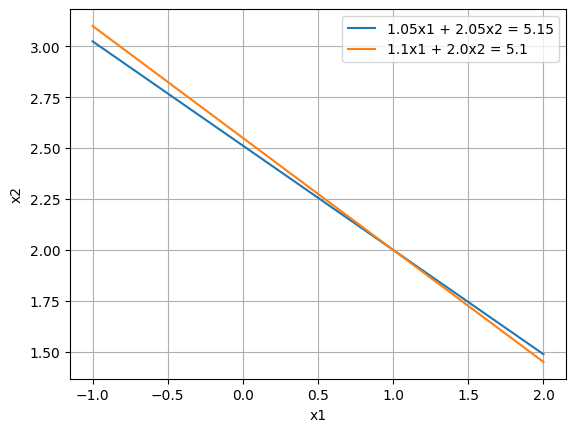

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# funções lambda do sistema 1
f1 = lambda x: (5.15 - 1.05 * x) / 2.05
f2 = lambda x: (5.1 - 1.1 * x) / 2.0

x = np.linspace(-1, 2, 10)
y1 = f1(x)
y2 = f2(x)

plt.plot(x, y1, label='1.05x1 + 2.05x2 = 5.15')
plt.plot(x, y2, label='1.1x1 + 2.0x2 = 5.1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.grid(True)
plt.show()

Analisando o gráfico é possível perceber que a interseção dessas linhas é onde fica a solução do sistema, ou seja, aproximadamente em x1 = 1 e x2 = 2.
É importante destacar que essa abordagem gráfica é particularmente eficaz quando lidamos com sistemas mais simples, envolvendo duas variáveis. À medida que o número de variáveis aumenta, a visualização gráfica torna-se impraticável.

#### B)

Segue abaixo a aplicação do sistema para o método da eliminação de Gauss com pivotamento parcial. Aqui vale ressaltar que quando não é definido o número de casas decimais a opção por padrão é 100 digitos

In [ ]:
A = np.array([[1.05, 2.05],
              [1.1, 2.0]])
b = np.array([5.15, 5.1])

print(f'\n---Modo exato---')
resultado = eliminacaoGauss(2, A.copy(), b.copy(), True)
print(f'\nresultado: {resultado}\n\n')


---Modo exato---

Det: -0.15499999999999925

Info: 
0

Matriz final: 
[[1.1        2.        ]
 [0.         0.14090909]]

resultado: [1. 2.]




#### C)

Segue abaixo novamente a aplicação do sistema para o método da eliminação de Gauss com pivotamento parcial. No entanto, agora utilizando arredondamento, com precisão de três algarismos significativos

In [ ]:
print(f'\n---Modo aproximado---')
teste = eliminacaoGauss(2, A.copy(), b.copy(), True, 3)
print(f'\nresultado: {resultado}')


---Modo aproximado---

Det: -0.156

Info: 
0

Matriz final: 
[[1.1   2.   ]
 [0.    0.142]]

resultado: [1. 2.]


#### D)

Analisando os resultados vemos que ambas abordagem conseguiram convergir para o resultado, x1 = 1 e x2 = 2.
O uso de um limite nos algarismos significativos com arredondamento surgiu efeito apenas nos cálculos intermediários, como o determinante que pode variar dependendo da precisão numérica utilizada nos cálculos.
O método de eliminação de Gauss com pivotamento parcial ajuda a simplificar o sistema para encontrar essas soluções. Conforme visto em aula, o processo de eliminação geram elementos não-nulos, onde originalmente tinham elementos nulos. Técnicas de Pivoteamento amenizam tais erros e reduzem os problemas de arredondamento durante a Eliminação de Gauss. Como as duas abordagens utilizaram o pivoteamento parcial é esperado que esses erros tenham menos chancer de acontecer.


Em resumo, os resultados estão de acordo com as expectativas para um sistema consistente e determinado.

#Anotações Aula

In [ ]:
A1 = np.array([[2.0, 3.0, -1.0],
              [4.0, 4.0, -3.0],
              [2.0, -3.0, 1.0]])
b1 = np.array([5.0, 3.0, -1.0])

A2 = np.array([[1.5, 5.4, 3.3],
              [4.2, 2.3, 4.5],
              [2.7, 5.7, 7.8]])
b2 = np.array([10.0, 11.7, 8.9])

print(f'Matriz inicial: \n{A1}')
solucao = eliminacaoGauss(3, A1, b1, 'Sem pivotamento')
print(f'\nVetor Solucao: \n{solucao}')

Matriz inicial: 
[[ 2.  3. -1.]
 [ 4.  4. -3.]
 [ 2. -3.  1.]]

Det: -20.0

Info: 
0

Matriz final: 
[[ 4.   4.  -3. ]
 [ 0.  -5.   2.5]
 [ 0.   0.   1. ]]

Vetor Solucao: 
[1. 2. 3.]


In [ ]:
A3 = np.array([[3.0, 2.0, 4.0],
              [1.0, 1.0, 2.0],
              [4.0, 3.0, -2.0]])
b3 = np.array([1.0, 2.0, 3.0])

print(f'Matriz inicial: \n{A3}')
solucao = FatoracaoLU(3, 3, A1, b1)
print(f'\nVetor Solucao: \n{solucao}')

Matriz inicial: 
[[ 3.  2.  4.]
 [ 1.  1.  2.]
 [ 4.  3. -2.]]

Pivot: [0, 1, 2]

PdU: -20.0

Matriz U: 
[[ 4.   4.  -3. ]
 [ 0.  -5.   2.5]
 [ 0.   0.   1. ]] 

Matriz L: 
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]

Vetor Solucao: 
[1. 2. 3.]


In [ ]:
A4 = np.array([[1.0, 1.0, 0.0],
              [1.0, 2.0, -1.0],
              [0.0, -1.0, 3.0]])
b4 = np.array([2.0, 1.0, 5.0])

A5 = np.array([[4.0, 2.0, -4.0],
              [2.0, 10.0, 4.0],
              [-4.0, 4.0, 9.0]])
b5 = np.array([0.0, 6.0, 5.0])


print(f'Matriz inicial: \n{A5}')
solucao = fatoracaoCholesky(3, A5, b5)
print(f'\nVetor Solucao: \n{solucao}')

Matriz inicial: 
[[ 4.  2. -4.]
 [ 2. 10.  4.]
 [-4.  4.  9.]]

Det: 36.0

Info: 0

Matriz G: 
[[ 2.  0.  0.]
 [ 1.  3.  0.]
 [-2.  2.  1.]] 

Matriz Gt: 
[[ 2.  1. -2.]
 [ 0.  3.  2.]
 [ 0.  0.  1.]]

Vetor Solucao: 
[1. 0. 1.]


In [ ]:
A6 = np.array([[10.0, 2.0, 1.0],
              [1.0, 5.0, 1.0],
              [2.0, 3.0, 10.0]])
b6 = np.array([7.0, -8.0, 6.0])

solucao = GaussJacobi(3, A6, b6, 0.05, 10)
print(f'\nVetor Solucao: \n{solucao}')

solucao = GaussSeidel(3, A6, b6, 0.05, 10)
print(f'\nVetor Solucao: \n{solucao}')


Teste Raio Espectral: 
Não converge

Teste critério Linhas: 
Converge

Teste critério Colunas: 
Não converge

Iter: 3

Info: 0

Vetor Solucao: 
[0.9994, -1.9888, 0.9983999999999998]

Teste Raio Espectral: 
Não converge

Teste critério Linhas: 
Converge

Teste critério Colunas: 
Não converge

Teste critério Sassenfeld: 
Converge

Iter: 2

Info: 0

Vetor Solucao: 
[0.9842400000000001, -1.993168, 1.0011024]
